In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import requests

In [2]:
VERSION = '10.15.1'

# CHAMPION

## 전체 챔프 데이터 다운 및 정리

In [3]:
#champion info load
champ_req = requests.get('http://ddragon.leagueoflegends.com/cdn/' + VERSION + '/data/en_US/champion.json')
champ_ls = list(champ_req.json()['data'].keys())
champ_df = pd.DataFrame()

for i in range(len(champ_ls)):
    pre_df = json_normalize(champ_req.json()['data'][champ_ls[i]])
    champ_df = champ_df.append(pre_df)
    
champ_df.drop(columns=['blurb', 'image.full', 'image.group', 'image.h', 'image.sprite', 'image.w', 'image.x', 'image.y', 'title'], inplace=True)
champ_df.set_index('name', inplace=True)
champ_df.to_csv('./data/champ_' + VERSION + '.csv')
champ_df.head()

,id,info.attack,info.defense,info.difficulty,info.magic,key,partype,stats.armor,stats.armorperlevel,stats.attackdamage,...,stats.hpregenperlevel,stats.movespeed,stats.mp,stats.mpperlevel,stats.mpregen,stats.mpregenperlevel,stats.spellblock,stats.spellblockperlevel,tags,version
name,,,,,,,,,,,,,,,,,,,,,
Aatrox,Aatrox,8,4,4,3,266,Blood Well,38.00,3.25,60.00,...,1.00,345,0.0,0.0,0.000,0.000,32.1,1.25,"[Fighter, Tank]",10.15.1
Ahri,Ahri,3,4,5,8,103,Mana,20.88,3.50,53.04,...,0.60,330,418.0,25.0,8.000,0.800,30.0,0.50,"[Mage, Assassin]",10.15.1
Akali,Akali,5,3,7,8,84,Energy,23.00,3.50,62.40,...,0.50,345,200.0,0.0,50.000,0.000,37.0,1.25,[Assassin],10.15.1
Alistar,Alistar,6,9,7,5,12,Mana,44.00,3.50,62.00,...,0.85,330,350.0,40.0,8.500,0.800,32.1,1.25,"[Tank, Support]",10.15.1
Amumu,Amumu,2,6,3,8,32,Mana,33.00,3.80,53.38,...,0.85,335,287.2,40.0,7.382,0.525,32.1,1.25,"[Tank, Mage]",10.15.1


## 전체 챔프 데이터 불러오기

In [4]:
champ_df = pd.read_csv('./data/champ_' + VERSION + '.csv')
champ_df.head()

,name,id,info.attack,info.defense,info.difficulty,info.magic,key,partype,stats.armor,stats.armorperlevel,...,stats.hpregenperlevel,stats.movespeed,stats.mp,stats.mpperlevel,stats.mpregen,stats.mpregenperlevel,stats.spellblock,stats.spellblockperlevel,tags,version
0,Aatrox,Aatrox,8,4,4,3,266,Blood Well,38.00,3.25,...,1.00,345,0.0,0.0,0.000,0.000,32.1,1.25,"['Fighter', 'Tank']",10.15.1
1,Ahri,Ahri,3,4,5,8,103,Mana,20.88,3.50,...,0.60,330,418.0,25.0,8.000,0.800,30.0,0.50,"['Mage', 'Assassin']",10.15.1
2,Akali,Akali,5,3,7,8,84,Energy,23.00,3.50,...,0.50,345,200.0,0.0,50.000,0.000,37.0,1.25,['Assassin'],10.15.1
3,Alistar,Alistar,6,9,7,5,12,Mana,44.00,3.50,...,0.85,330,350.0,40.0,8.500,0.800,32.1,1.25,"['Tank', 'Support']",10.15.1
4,Amumu,Amumu,2,6,3,8,32,Mana,33.00,3.80,...,0.85,335,287.2,40.0,7.382,0.525,32.1,1.25,"['Tank', 'Mage']",10.15.1


# 챔프 이름-아이디 저장하기

In [7]:
champ_name_key_df = champ_df[['name', 'key']]
champ_name_key_df.set_index('key', inplace=True)
champ_name_key_df.sort_index(inplace=True)
champ_name_key_df.to_csv('./data/champ_key_' + VERSION + '.csv')

C:\Users\LG\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## 개별 챔프 데이터 불러오기

In [6]:
all_champ_df = pd.DataFrame()

for name in champ_df.id:
    print(name)
    address = 'http://ddragon.leagueoflegends.com/cdn/' + VERSION + '/data/en_US/champion/' + name + '.json'
    champ_req = requests.get(address)
    champ_data_df = json_normalize(champ_req.json()['data'][name])
    champ_data_df.drop(columns=['allytips', 'blurb', 'enemytips', 'image.full', 'image.group', 'image.h', 'image.sprite', 'image.w', 'image.x', 'image.y',
                               'passive.image.full', 'passive.image.group', 'passive.image.h', 'passive.image.sprite', 'passive.image.w', 'passive.image.x', 'passive.image.y',
                               'skins', 'lore', 'title', 'id', 'partype'], inplace=True)
    
    rec = champ_data_df['recommended'].values[0][4]
    champ_data_df['recommended'] = [rec['blocks']]

    q = champ_data_df['spells'].values[0][0]
    w = champ_data_df['spells'].values[0][1]    
    e = champ_data_df['spells'].values[0][2]
    r = champ_data_df['spells'].values[0][3]
    
    champ_data_df['skills.q'] = [q]
    champ_data_df['skills.w'] = [w]
    champ_data_df['skills.e'] = [e]
    champ_data_df['skills.r'] = [r]

    champ_data_df.drop(columns=['spells'], inplace=True)
    all_champ_df = all_champ_df.append(champ_data_df, ignore_index=True)
    
all_champ_df.to_csv('./data/champ_' + VERSION + '_cleansed.csv')

Aatrox
Ahri
Akali
Alistar
Amumu
Anivia
Annie
Aphelios
Ashe
AurelionSol
Azir
Bard
Blitzcrank
Brand
Braum
Caitlyn
Camille
Cassiopeia
Chogath
Corki
Darius
Diana
Draven
DrMundo
Ekko
Elise
Evelynn
Ezreal
Fiddlesticks
Fiora
Fizz
Galio
Gangplank
Garen
Gnar
Gragas
Graves
Hecarim
Heimerdinger
Illaoi
Irelia
Ivern
Janna
JarvanIV
Jax
Jayce
Jhin
Jinx
Kaisa
Kalista
Karma
Karthus
Kassadin
Katarina
Kayle
Kayn
Kennen
Khazix
Kindred
Kled
KogMaw
Leblanc
LeeSin
Leona
Lillia
Lissandra
Lucian
Lulu
Lux
Malphite
Malzahar


IndexError: list index out of range

In [46]:
champ_data_df.recommended[0]

[{'champion': 'Malzahar',
  'title': 'MalzaharARAM',
  'map': 'HA',
  'mode': 'ARAM',
  'type': 'riot',
  'customTag': '',
  'sortrank': 0,
  'extensionPage': False,
  'customPanel': None,
  'blocks': [{'type': 'starting',
    'recMath': False,
    'recSteps': False,
    'minSummonerLevel': -1,
    'maxSummonerLevel': -1,
    'showIfSummonerSpell': '',
    'hideIfSummonerSpell': '',
    'appendAfterSection': '',
    'visibleWithAllOf': [''],
    'hiddenWithAnyOf': [''],
    'items': [{'id': '3802', 'count': 1, 'hideCount': False},
     {'id': '2003', 'count': 2, 'hideCount': False}]},
   {'type': 'essential',
    'recMath': False,
    'recSteps': False,
    'minSummonerLevel': -1,
    'maxSummonerLevel': -1,
    'showIfSummonerSpell': '',
    'hideIfSummonerSpell': '',
    'appendAfterSection': '',
    'visibleWithAllOf': [''],
    'hiddenWithAnyOf': [''],
    'items': [{'id': '3285', 'count': 1, 'hideCount': False},
     {'id': '3020', 'count': 1, 'hideCount': False},
     {'id': '315

In [14]:
name = 'Varus'
address = 'http://ddragon.leagueoflegends.com/cdn/' + VERSION + '/data/en_US/champion/' + name + '.json'
champ_req = requests.get(address)
champ_data_df = json_normalize(champ_req.json()['data'][name])
champ_data_df.drop(columns=['allytips', 'blurb', 'enemytips', 'image.full', 'image.group', 'image.h', 'image.sprite', 'image.w', 'image.x', 'image.y',
                           'passive.image.full', 'passive.image.group', 'passive.image.h', 'passive.image.sprite', 'passive.image.w', 'passive.image.x', 'passive.image.y',
                           'skins', 'lore', 'title', 'id', 'partype'], inplace=True)

rec = champ_data_df['recommended'].values[0][4]
champ_data_df['recommended'] = [rec['blocks']]

q = champ_data_df['spells'].values[0][0]
w = champ_data_df['spells'].values[0][1]    
e = champ_data_df['spells'].values[0][2]
r = champ_data_df['spells'].values[0][3]

champ_data_df['skills.q'] = [q]
champ_data_df['skills.w'] = [w]
champ_data_df['skills.e'] = [e]
champ_data_df['skills.r'] = [r]

champ_data_df.drop(columns=['spells'], inplace=True)

champ_data_df.head()

,info.attack,info.defense,info.difficulty,info.magic,key,name,passive.description,passive.name,recommended,stats.armor,...,stats.mpperlevel,stats.mpregen,stats.mpregenperlevel,stats.spellblock,stats.spellblockperlevel,tags,skills.q,skills.w,skills.e,skills.r
0,7,3,2,4,110,Varus,"On kill or assist, Varus temporarily gains Att...",Living Vengeance,"[{'type': 'starting', 'recMath': False, 'recSt...",27,...,33,8,0.8,30,0.5,"[Marksman, Mage]","{'id': 'VarusQ', 'name': 'Piercing Arrow', 'de...","{'id': 'VarusW', 'name': 'Blighted Quiver', 'd...","{'id': 'VarusE', 'name': 'Hail of Arrows', 'de...","{'id': 'VarusR', 'name': 'Chain of Corruption'..."


In [11]:
champ_data_df.columns

Index(['info.attack', 'info.defense', 'info.difficulty', 'info.magic', 'key',
       'name', 'passive.description', 'passive.name', 'recommended', 'spells',
       'stats.armor', 'stats.armorperlevel', 'stats.attackdamage',
       'stats.attackdamageperlevel', 'stats.attackrange', 'stats.attackspeed',
       'stats.attackspeedperlevel', 'stats.crit', 'stats.critperlevel',
       'stats.hp', 'stats.hpperlevel', 'stats.hpregen',
       'stats.hpregenperlevel', 'stats.movespeed', 'stats.mp',
       'stats.mpperlevel', 'stats.mpregen', 'stats.mpregenperlevel',
       'stats.spellblock', 'stats.spellblockperlevel', 'tags'],
      dtype='object')

In [21]:
stats = ['stats.armor', 'stats.attackdamage', 'stats.attackrange', 'stats.attackspeed', 
         'stats.crit', 'stats.critperlevel', 'stats.hp', 'stats.hpregen', 'stats.movespeed', 'stats.mp', 
         'stats.mpregen', 'stats.spellblock']

stats_per_level = ['stats.armorperlevel', 'stats.attackdamageperlevel', 'stats.attackspeedperlevel', 
         'stats.critperlevel', 'stats.hpperlevel', 'stats.hpregenperlevel', 'stats.mpperlevel', 
         'stats.mpregenperlevel', 'stats.spellblockperlevel']

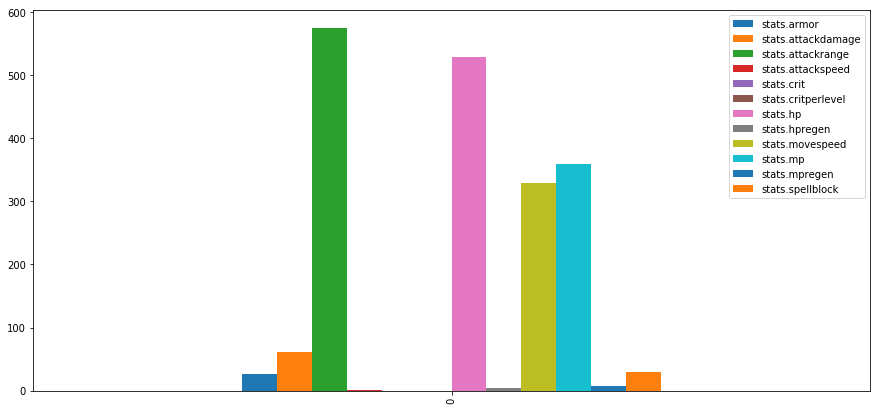

In [22]:
champ_data_df[stats].plot(figsize=(15,7), kind='bar')

In [99]:
q

{'id': 'VarusQ',
 'name': 'Piercing Arrow',
 'description': 'Varus readies and then fires a powerful shot that gains extra range and damage the longer he spends preparing to fire.',
 'tooltip': '<span class="colorFF9900">First Cast:</span> Varus starts drawing back his next shot, gradually increasing its range and damage. While preparing to shoot, Varus\' Movement Speed is slowed by {{ e7 }}%. After {{ e5 }} seconds, Piercing Arrow fails but refunds {{ e4 }}% of its Mana cost.<br /><br /><span class="colorFF9900">Second Cast:</span> Varus fires, dealing <physicalDamage>{{ totaldamagemintooltip }}</physicalDamage> to <physicalDamage>{{ totaldamagemax }} physical damage</physicalDamage>, reduced by {{ e3 }}% per enemy hit (minimum {{ e9 }}%).<br /><br />Piercing Arrow\'s cooldown is reduced by {{ f1 }} seconds if the arrow detonates <span class="colorB829FF">Blight</span> stacks on at least one enemy champion.',
 'leveltip': {'label': ['Maximum Damage',
   'Cooldown',
   'Mana Cost',
   

In [100]:
w

{'id': 'VarusW',
 'name': 'Blighted Quiver',
 'description': "Passive: Varus' basic attacks deal bonus magic damage and apply Blight. Varus' other abilities detonate Blight, dealing magic damage based on the target's maximum Health. Active: Varus empowers his next Piercing Arrow.",
 'tooltip': ' <spellPassive>Passive: </spellPassive>Varus\' basic attacks deal {{ e1 }} <scaleAP>(+{{ a1 }})</scaleAP> bonus magic damage and apply <span class="colorB829FF">Blight</span> for {{ e3 }} seconds (stacks {{ e4 }} times).<br /><br />Varus\' other abilities detonate <span class="colorB829FF">Blight</span>, dealing magic damage equal to {{ e2 }}% <scaleAP>(+{{ a2 }}%)</scaleAP> of the target\'s maximum Health per stack.<br /><br /><spellPassive>Active: </spellPassive>Varus\' next Piercing Arrow deals bonus magic damage equal to <span class="coloreeeeee">{{ f2*100 }}%</span> to <span class="coloreeeeee">{{ f1*100 }}%</span> of the target\'s missing health (scales with Piercing Arrow charge).<br /><b

In [101]:
e

{'id': 'VarusE',
 'name': 'Hail of Arrows',
 'description': "Varus fires a hail of arrows that deal physical damage and desecrate the ground. Desecrated ground slows enemies' Movement Speed and reduces their self healing and regeneration.",
 'tooltip': 'Varus fires a hail of arrows that deals {{ e1 }} <scaleAD>(+{{ a1 }})</scaleAD> physical damage and desecrates the ground for {{ e3 }} seconds.<br /><br />Desecrated Ground slows enemy Movement Speed by {{ e2 }}% and reduces healing effects by {{ e4 }}%.',
 'leveltip': {'label': ['Damage', 'Slow', 'Cooldown'],
  'effect': ['{{ e1 }} -> {{ e1NL }}',
   '{{ effect2amount*-100.000000 }}% -> {{ effect2amountnl*-100.000000 }}%',
   '{{ cooldown }} -> {{ cooldownNL }}']},
 'maxrank': 5,
 'cooldown': [18, 16, 14, 12, 10],
 'cooldownBurn': '18/16/14/12/10',
 'cost': [80, 80, 80, 80, 80],
 'costBurn': '80',
 'datavalues': {},
 'effect': [None,
  [50, 90, 130, 170, 210],
  [25, 30, 35, 40, 45],
  [4, 4, 4, 4, 4],
  [40, 40, 40, 40, 40],
  [300, 3

In [102]:
r

{'id': 'VarusR',
 'name': 'Chain of Corruption',
 'description': 'Varus flings out a damaging tendril of corruption that immobilizes the first enemy champion hit and then spreads towards nearby uninfected champions, immobilizing them too on contact.',
 'tooltip': 'Varus flings out a tendril of corruption that deals {{ e1 }} <scaleAP>(+{{ a1 }})</scaleAP> magic damage and immobilizes the first enemy champion hit for {{ e2 }} seconds.<br /><br />The corruption then spreads towards nearby uninfected enemy champions. If it reaches them, they take the same damage and are also immobilized. Immobilized units gain {{ e4 }} <span class="colorB829FF">Blight</span> stacks over the duration.',
 'leveltip': {'label': ['Damage', 'Cooldown'],
  'effect': ['{{ e1 }} -> {{ e1NL }}', '{{ cooldown }} -> {{ cooldownNL }}']},
 'maxrank': 3,
 'cooldown': [130, 100, 70],
 'cooldownBurn': '130/100/70',
 'cost': [100, 100, 100],
 'costBurn': '100',
 'datavalues': {},
 'effect': [None,
  [150, 200, 250],
  [2, 

In [90]:
champ_data_df['spells'].values[0]

[{'id': 'AatroxQ',
  'name': 'The Darkin Blade',
  'description': 'Aatrox slams his greatsword down, dealing physical damage. He can swing three times, each with a different area of effect.',
  'tooltip': 'Aatrox slams his greatsword down, dealing <physicalDamage>{{ qdamage }} physical damage</physicalDamage>. The Darkin Blade may be re-cast 2 additional times, each one increasing in damage.<br /><br />Each strike can hit with the Edge, briefly knocking enemies up and dealing more damage.',
  'leveltip': {'label': ['Cooldown', 'Damage', 'Total AD Ratio'],
   'effect': ['{{ cooldown }} -> {{ cooldownNL }}',
    '{{ qbasedamage }} -> {{ qbasedamageNL }}',
    '{{ qtotaladratio*100.000000 }}% -> {{ qtotaladrationl*100.000000 }}%']},
  'maxrank': 5,
  'cooldown': [14, 12, 10, 8, 6],
  'cooldownBurn': '14/12/10/8/6',
  'cost': [0, 0, 0, 0, 0],
  'costBurn': '0',
  'datavalues': {},
  'effect': [None,
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0],
   [0, 0, 0

In [66]:
champ_data_df['recommended.ARAM'][0]

[{'type': 'starting',
  'recMath': False,
  'recSteps': False,
  'minSummonerLevel': -1,
  'maxSummonerLevel': -1,
  'showIfSummonerSpell': '',
  'hideIfSummonerSpell': '',
  'appendAfterSection': '',
  'visibleWithAllOf': [''],
  'hiddenWithAnyOf': [''],
  'items': [{'id': '1001', 'count': 1, 'hideCount': False},
   {'id': '2051', 'count': 1, 'hideCount': False},
   {'id': '2003', 'count': 3, 'hideCount': False}]},
 {'type': 'essential',
  'recMath': False,
  'recSteps': False,
  'minSummonerLevel': -1,
  'maxSummonerLevel': -1,
  'showIfSummonerSpell': '',
  'hideIfSummonerSpell': '',
  'appendAfterSection': '',
  'visibleWithAllOf': [''],
  'hiddenWithAnyOf': [''],
  'items': [{'id': '3071', 'count': 1, 'hideCount': False},
   {'id': '3111', 'count': 1, 'hideCount': False},
   {'id': '3053', 'count': 1, 'hideCount': False}]},
 {'type': 'offensive',
  'recMath': False,
  'recSteps': False,
  'minSummonerLevel': -1,
  'maxSummonerLevel': -1,
  'showIfSummonerSpell': '',
  'hideIfSummo

## 데이터 분석

In [3]:
champ_df = pd.read_csv('./data/champ_' + VERSION + '_cleansed.csv')
champ_df.head()

,name,info.attack,info.defense,info.difficulty,info.magic,key,partype,stats.armor,stats.armorperlevel,stats.attackdamage,...,stats.hpregenperlevel,stats.movespeed,stats.mp,stats.mpperlevel,stats.mpregen,stats.mpregenperlevel,stats.spellblock,stats.spellblockperlevel,tags,version
0,Aatrox,8,4,4,3,266,Blood Well,38.00,3.25,60.00,...,1.00,345,0.0,0.0,0.000,0.000,32.1,1.25,"['Fighter', 'Tank']",10.14.1
1,Ahri,3,4,5,8,103,Mana,20.88,3.50,53.04,...,0.60,330,418.0,25.0,8.000,0.800,30.0,0.50,"['Mage', 'Assassin']",10.14.1
2,Akali,5,3,7,8,84,Energy,23.00,3.50,62.40,...,0.50,345,200.0,0.0,50.000,0.000,37.0,1.25,['Assassin'],10.14.1
3,Alistar,6,9,7,5,12,Mana,44.00,3.50,62.00,...,0.85,330,350.0,40.0,8.500,0.800,32.1,1.25,"['Tank', 'Support']",10.14.1
4,Amumu,2,6,3,8,32,Mana,33.00,3.80,53.38,...,0.85,335,287.2,40.0,7.382,0.525,32.1,1.25,"['Tank', 'Mage']",10.14.1


In [4]:
print('챔피언 수: ', len(champ_df))
print('속성: ', len(champ_df.columns), '\n', champ_df.columns)

챔피언 수:  148
속성:  29 
 Index(['name', 'info.attack', 'info.defense', 'info.difficulty', 'info.magic',
       'key', 'partype', 'stats.armor', 'stats.armorperlevel',
       'stats.attackdamage', 'stats.attackdamageperlevel', 'stats.attackrange',
       'stats.attackspeed', 'stats.attackspeedperlevel', 'stats.crit',
       'stats.critperlevel', 'stats.hp', 'stats.hpperlevel', 'stats.hpregen',
       'stats.hpregenperlevel', 'stats.movespeed', 'stats.mp',
       'stats.mpperlevel', 'stats.mpregen', 'stats.mpregenperlevel',
       'stats.spellblock', 'stats.spellblockperlevel', 'tags', 'version'],
      dtype='object')


### PARTYPE

In [5]:
champ_partype = {}
partype_list = champ_df['partype'].unique()
print('**partype list**')
print(partype_list, '\n')

for pt in partype_list:
    champ_partype[pt] = champ_df.loc[champ_df['partype'] == pt]
    print('{0:<15}: {1:3}'.format(pt, len(champ_partype[pt])))
    if len(champ_partype[pt]) < 10:
        print(champ_partype[pt].name.values)
    print()

**partype list**
['Blood Well' 'Mana' 'Energy' 'None' 'Rage' 'Courage' 'Shield' 'Fury'
 'Ferocity' 'Heat' 'Grit' 'Crimson Rush' 'Flow'] 

Blood Well     :   1
['Aatrox']

Mana           : 125

Energy         :   5
['Akali' 'Kennen' 'Lee Sin' 'Shen' 'Zed']

None           :   5
['Dr. Mundo' 'Garen' 'Katarina' 'Riven' 'Zac']

Rage           :   2
['Gnar' "Rek'Sai"]

Courage        :   1
['Kled']

Shield         :   1
['Mordekaiser']

Fury           :   3
['Renekton' 'Shyvana' 'Tryndamere']

Ferocity       :   1
['Rengar']

Heat           :   1
['Rumble']

Grit           :   1
['Sett']

Crimson Rush   :   1
['Vladimir']

Flow           :   1
['Yasuo']



In [ ]:
champ_party

# Item

In [15]:
#champion info load
item_req = requests.get('http://ddragon.leagueoflegends.com/cdn/' + VERSION + '/data/en_US/item.json')
item_ls = list(item_req.json()['data'].keys())
item_df = pd.DataFrame()

for i in range(len(item_ls)):
    pre_df = json_normalize(item_req.json()['data'][item_ls[i]])
    item_df = item_df.append(pre_df)
    
# item_df.to_csv('./data/item_' + VERSION + '.csv')
item_df.head()

C:\Users\LG\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,colloq,consumeOnFull,consumed,depth,description,effect.Effect10Amount,effect.Effect11Amount,effect.Effect12Amount,effect.Effect13Amount,effect.Effect14Amount,...,stats.FlatHPRegenMod,stats.FlatMPPoolMod,stats.FlatMagicDamageMod,stats.FlatMovementSpeedMod,stats.FlatPhysicalDamageMod,stats.FlatSpellBlockMod,stats.PercentAttackSpeedMod,stats.PercentLifeStealMod,stats.PercentMovementSpeedMod,tags
0,;,NaN,NaN,NaN,<groupLimit>Limited to 1 pair of boots.</group...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,[Boots]
0,;,NaN,NaN,NaN,<stats><mana>+25% Base Mana Regen </mana></stats>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[ManaRegen]
0,;,NaN,NaN,NaN,<stats>+50% Base Health Regen </stats>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[HealthRegen]
0,;,NaN,NaN,2.0,<stats>+380 Health</stats>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Health]
0,;,NaN,NaN,NaN,<stats>+20% Critical Strike Chance</stats>,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[CriticalStrike]


In [19]:
#champion info load
item_req = requests.get('http://ddragon.leagueoflegends.com/cdn/' + VERSION + '/data/en_US/item.json')
item_ls = []

for i in list(range(0,10000)):
    try:
        a = item_req.json()['data'][str(i)]
        item_ls.append(str(i))
    except:
        pass
    
item_df = pd.DataFrame()

for item_id in item_ls:
    try:
        name = item_req.json()['data'][item_id]['name']
    except:
        name = np.nan
        
    try:
        colloq = item_req.json()['data'][item_id]['colloq']
    except:
        colloq = np.nan
    
    try:
        upper_item = item_req.json()['data'][item_id]['into']
    except:
        upper_item = np.nan
        
    try:
        lower_item = item_req.json()['data'][item_id]['from']
    except:
        lower_item = np.nan
        
    try:
        explain = item_req.json()['data'][item_id]['plaintext']
    except:
        explain = np.nan
    
    try:
        buy_price = item_req.json()['data'][item_id]['gold']['base']
    except:
        buy_price = np.nan
        
    try:
        sell_price = item_req.json()['data'][item_id]['gold']['sell']
    except:
        sell_price = np.nan
    
    try:
        description = item_req.json()['data'][item_id]['description']
    except:
        description = np.nan
        
    try:
        tag = item_req.json()['data'][item_id]['tags']
    except:
        tag = np.nan
        
    try:
        stat = item_req.json()['data'][item_id]['stats']
    except:
        stat = np.nan
        
    try:
        effect = item_req.json()['data'][item_id]['effect']
    except:
        effect = np.nan
    
    pre_df = pd.DataFrame({'item_id' : [item_id],
                           'name' : [name],
                           'colloq' : [colloq],
                           'upper_item' : [upper_item],
                           'lower_item' : [lower_item],
                           'explain' : [explain],
                           'buy_price' : [buy_price],
                           'sell_price' : [sell_price],
                           "description" : [description],
                           'tag' : [tag],
                           'stat' : [stat],
                           'effect' : [effect]
                           
                          })
    item_df = item_df.append(pre_df)
    
item_df.to_csv('./data/item_' + VERSION + '.csv')
item_df.head()

,item_id,name,colloq,upper_item,lower_item,explain,buy_price,sell_price,description,tag,stat,effect
0,1001,Boots of Speed,;,"[3006, 3047, 3020, 3158, 3111, 3117, 3009, 4001]",NaN,Slightly increases Movement Speed,300,210,<groupLimit>Limited to 1 pair of boots.</group...,[Boots],{'FlatMovementSpeedMod': 25},NaN
0,1004,Faerie Charm,;,"[3028, 3070, 3073, 3114]",NaN,Slightly increases Mana Regen,125,88,<stats><mana>+25% Base Mana Regen </mana></stats>,[ManaRegen],{},NaN
0,1006,Rejuvenation Bead,;,"[3077, 3801, 3194, 4401]",NaN,Slightly increases Health Regen,150,105,<stats>+50% Base Health Regen </stats>,[HealthRegen],{},NaN
0,1011,Giant's Belt,;,"[3083, 3084, 3022, 3143, 3742]",[1028],Greatly increases Health,600,700,<stats>+380 Health</stats>,[Health],{'FlatHPPoolMod': 380},NaN
0,1018,Cloak of Agility,;,"[3086, 3095, 3031, 3508]",NaN,Increases critical strike chance,800,560,<stats>+20% Critical Strike Chance</stats>,[CriticalStrike],{'FlatCritChanceMod': 0.2},NaN
